In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from QAOAKit import (
    opt_angles_for_graph,
    get_fixed_angles,
    get_graph_id,
    get_graph_from_id,
    angles_to_qaoa_format,
    beta_to_qaoa_format,
    gamma_to_qaoa_format,
    angles_to_qiskit_format,
    angles_to_qtensor_format,
    get_3_reg_dataset_table,
    get_3_reg_dataset_table_row,
    get_full_qaoa_dataset_table_row,
    get_full_qaoa_dataset_table,
    get_fixed_angle_dataset_table,
    get_fixed_angle_dataset_table_row,
    qaoa_maxcut_energy,
    noisy_qaoa_maxcut_energy,
    angles_from_qiskit_format,

)

In [2]:
# check the QAOAKit dataset
reg3s = get_3_reg_dataset_table()
print(reg3s.columns)
reg3s.dropna(subset=['C_opt'], how='any')
reg3s.head(10)

Index(['G', 'n', 'C_{true opt}', 'C_fixed', 'C_opt', 'beta', 'gamma',
       'all beta (degenerate optima)', 'all gamma (degenerate optima)',
       'theta'],
      dtype='object')


G  n  \
pynauty_cert                                       p_max                    
b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x00... 1      (0, 1, 2, 3)  4   
                                                   2      (0, 1, 2, 3)  4   
                                                   3      (0, 1, 2, 3)  4   
                                                   4      (0, 1, 2, 3)  4   
                                                   5      (0, 1, 2, 3)  4   
                                                   6      (0, 1, 2, 3)  4   
                                                   7      (0, 1, 2, 3)  4   
                                                   8      (0, 1, 2, 3)  4   
                                                   9      (0, 1, 2, 3)  4   
                                                   10     (0, 1, 2, 3)  4   

                                                          C_{true opt}  \
pynauty_cert                                       p_max                 
b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x00... 1               4.0   
                                                   2               4.0   
                                                   3               4.0   
                                                   4               4.0   
                                                   5               4.0   
                                                   6               4.0   
                                                   7               4.0   
                                                   8               4.0   
                                                   9               4.0   
                                                   10              4.0   

                                                           C_fixed     C_opt  \
pynauty_cert                                       p_max                       
b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x00... 1      3.488031  3.697516   
                                                   2      3.443514  4.000000   
                                                   3      3.725746       NaN   
                                                   4      3.799435       NaN   
                                                   5      3.902329       NaN   
                                                   6      3.821207       NaN   
                                                   7      3.856606       NaN   
                                                   8      3.902939       NaN   
                                                   9      3.869821       NaN   
                                                   10     3.909461       NaN   

                                                                                               beta  \
pynauty_cert                                       p_max                                              
b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x00... 1                          [0.41009128896428304]   
                                                   2      [0.28529502533693074, 0.3670557719502767]   
                                                   3                                            NaN   
                                                   4                                            NaN   
                                                   5                                            NaN   
                                                   6                                            NaN   
                                                   7                                            NaN   
                                                   8                                            NaN   
                                                   9                                            NaN   
                                                   10                                           NaN   

                                                         

In [3]:
# ! accumulate all the data frame, already done, comment them
# df_paths = ["2022-05-27_16:13:03_count_optima_p=1,2.p",
#             "2022-05-28_15:32:29_count_optima_fixed_angles_p=3.p",
#             "2022-05-28_16:41:34_count_optima_fixed_angles_p=4-6_nQ=4-10.p",
#             "2022-05-30_00:04:24_count_optima_fixed_angles_p=4-6_nQ=12.p",
#             "2022-05-29_10:37:46_count_optima_fixed_angles_nQ=14_p=4.p",
#             "2022-05-30_00:08:00_count_optima_fixed_angles_p=5-6_nQ=14.p",
#             ]
# df = pd.read_pickle(df_paths[0])
# for path in df_paths[1:]:
#     tmp = pd.read_pickle(path)
#     df = df.append(tmp)

# print(len(df))
# df.to_pickle("count_optima_p=1-6_nQ=4-16.p")

# ! read directly from this data frame
df = pd.read_pickle("count_optima_dataframe/count_optima_p=1-6_nQ=4-16.p")
print(len(df))

258


In [4]:
df.head(5)

,row_id,G,n_qubits,p,n_optima_list,has_opt
0,0,NaN,4,1,[26],True
1,1,NaN,4,2,"[18, 7, 7, 9, 10, 5]",True
2,10,NaN,6,1,[26],True
3,20,NaN,6,1,[24],True
4,11,NaN,6,2,"[20, 8, 9, 7, 16, 7]",True


In [5]:
# 1. take product of n_optima_list
# 2. take mean value of n_optima_list

def Pi(a):
    prod = 1.0
    for i in a:
        prod *= i
    return prod

df["prod_n_optima"] = df.apply(
    lambda x: Pi(x["n_optima_list"]), axis=1
)

df["avg_n_optima"] = df.apply(
   lambda x: np.mean(x["n_optima_list"]), axis=1
)

df.head()

,row_id,G,n_qubits,p,n_optima_list,has_opt,prod_n_optima,avg_n_optima
0,0,NaN,4,1,[26],True,26.0,26.000000
1,1,NaN,4,2,"[18, 7, 7, 9, 10, 5]",True,396900.0,9.333333
2,10,NaN,6,1,[26],True,26.0,26.000000
3,20,NaN,6,1,[24],True,24.0,24.000000
4,11,NaN,6,2,"[20, 8, 9, 7, 16, 7]",True,1128960.0,11.166667


In [6]:
avg = df.groupby('p').agg({'prod_n_optima': 'mean', 'avg_n_optima': 'mean'})
avg

,prod_n_optima,avg_n_optima
p,,
1,2.612500e+01,26.125000
2,1.519083e+06,11.079861
3,6.028446e+20,13.256944
4,1.889937e+41,14.896617
5,4.997656e+60,13.774269
6,1.154984e+105,16.244418


In [7]:
df["p"].value_counts()


1    48
2    48
3    48
4    38
5    38
6    38
Name: p, dtype: int64

In [8]:
df["n_qubits"].value_counts()

10    60
12    60
14    60
8     30
16    30
6     12
4      6
Name: n_qubits, dtype: int64

In [104]:
newdf = df.groupby(by=["n_qubits", "p"]).size()
newdf

n_qubits  p
4         1     1
          2     1
          3     1
          4     1
          5     1
          6     1
6         1     2
          2     2
          3     2
          4     2
          5     2
          6     2
8         1     5
          2     5
          3     5
          4     5
          5     5
          6     5
10        1    10
          2    10
          3    10
          4    10
          5    10
          6    10
12        1    10
          2    10
          3    10
          4    10
          5    10
          6    10
14        1    10
          2    10
          3    10
          4    10
          5    10
          6    10
16        1    10
          2    10
          3    10
dtype: int64

In [9]:
# https://blog.51cto.com/u_15069477/4257711
newdf = df.groupby(by=["n_qubits", "p"], as_index=False).agg({'prod_n_optima': 'mean', 'avg_n_optima': 'mean'})
newdf

,n_qubits,p,prod_n_optima,avg_n_optima
0,4,1,2.600000e+01,26.000000
1,4,2,3.969000e+05,9.333333
2,4,3,2.893045e+22,34.000000
3,4,4,7.181762e+42,41.142857
4,4,5,1.899109e+62,28.555556
5,4,6,4.388940e+106,49.424242
6,6,1,2.500000e+01,25.000000
7,6,2,5.683680e+05,8.333333
8,6,3,4.573959e+17,24.066667
9,6,4,4.116666e+34,21.750000


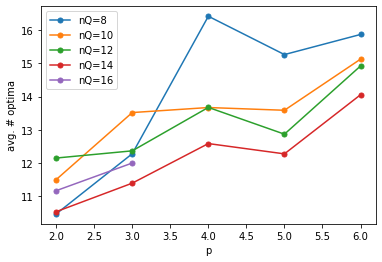

In [10]:
fig, ax = plt.subplots()
# for n_qubits in range(4, 17, 2):
for n_qubits in range(8, 17, 2):
    # tmp = newdf[newdf["n_qubits"]==n_qubits]
    tmp = newdf.loc[(newdf["n_qubits"]==n_qubits) & (newdf["p"]>=2)]
    
    # ax.plot(tmp["p"], tmp["avg_n_optima"], marker="o", color='purple', markersize=5, label="prod")
    ax.plot(tmp["p"], tmp["avg_n_optima"], marker="o", markersize=5, label=f"nQ={n_qubits}")

ax.set_ylabel("avg. # optima")
ax.set_xlabel("p")
# ax.set_title('')
ax.legend()

# fig.colorbar(c, ax=ax)
# fig.savefig(f'{figdir}/varIndices={var1_idx},{var2_idx}_nOpt{cnt_opt}.png')
# plt.close(fig)

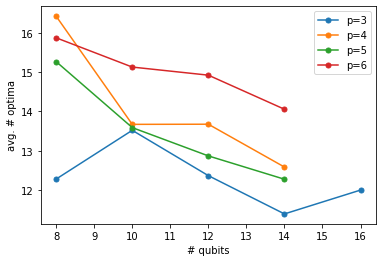

In [11]:
fig, ax = plt.subplots()
# for n_qubits in range(4, 17, 2):
for p in range(3, 7):
    # tmp = newdf[newdf["n_qubits"]==n_qubits]
    tmp = newdf.loc[(newdf["p"]==p) & (newdf["n_qubits"]>=8)]
    
    # ax.plot(tmp["p"], tmp["avg_n_optima"], marker="o", color='purple', markersize=5, label="prod")
    ax.plot(tmp["n_qubits"], tmp["avg_n_optima"], marker="o", markersize=5, label=f"p={p}")

ax.set_ylabel("avg. # optima")
ax.set_xlabel("# qubits")
# ax.set_title('')
ax.legend()

# fig.colorbar(c, ax=ax)
# fig.savefig(f'{figdir}/varIndices={var1_idx},{var2_idx}_nOpt{cnt_opt}.png')
# plt.close(fig)

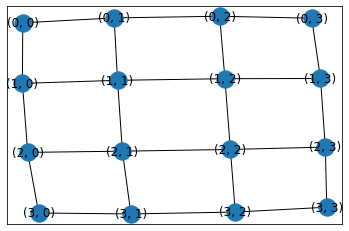

In [45]:
# below are some test for grid graph, ignore
G = nx.grid_2d_graph(4, 4)
len(G)
nx.draw_networkx(G)

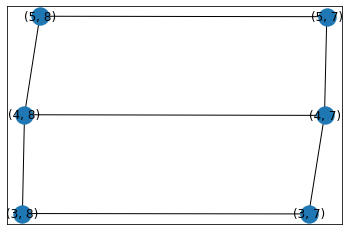

In [44]:
G = nx.grid_graph(dim=(range(7, 9), range(3, 6)))
len(G)
nx.draw_networkx(G)